# Pyber Analysis

**Number of rides, drivers, and average fares by city type**
* Urban areas had the most rides and number of drivers in 2016. Average fares varied from `$20` to `$29` depending on the city.
* Suburban areas had fewer rides and drivers, but the cost of rides was higher on average (`$23` to `$37`).
* Rural areas had even fewer rides and drivers, and even more expensive average fares (`$23` to `$50`).
(This pattern could be due to the shorter distance required for travels in urban areas, since many places are compactly located compared to suburban and rural areas.)

**Total fares by city type**
* Urban cities amounted to the largest fare earnings, making up almost two thirds of total fares earned in 2016. Suburban cities amounted to almost a third of total fares earned. Rural cities amounted to less than 10% of total fares earned.

**Total number of rides by city type**
* Over two thirds of total rides in 2016 were recorded in urban cities. Rides in suburban cities made up for almost a third of the total. Rural cities only contributed to 5% of the total.

**Total number of drivers by city type**
* Lastly, the number of Pyber drivers is greatest in urban cities (81% of total), while suburban cities had 17% and rural cities had less than 3%.

---

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
full_df = pd.merge(ride_df, city_df, on='city', how='left')

# Display the data table for preview
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

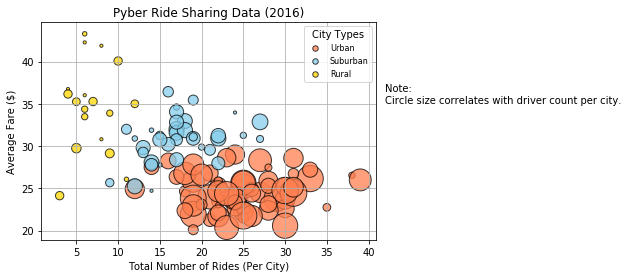

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban = full_df[full_df['type'] == 'Urban'].groupby('city')
suburb = full_df[full_df['type'] == 'Suburban'].groupby('city')
rural = full_df[full_df['type'] == 'Rural'].groupby('city')

# Circle size
s1 = [urban['driver_count'].mean()*10]
s2 = [suburb['driver_count'].mean()*10]
s3 = [rural['driver_count'].mean()*10]

# Build the scatter plots for each city types
plt.scatter(urban['driver_count'].count(), urban['fare'].mean(), s = s1, label = 'Urban', facecolor = 'coral', edgecolors='black', alpha = 0.75, linewidths = 1)
plt.scatter(suburb['driver_count'].count(), suburb['fare'].mean(), s = s2, label = 'Suburban', facecolor = 'skyblue', edgecolors='black', alpha = 0.75, linewidths = 1)
plt.scatter(rural['driver_count'].count(), rural['fare'].mean(), s = s3, label = 'Rural', facecolor = 'gold', edgecolors='black', alpha = 0.75, linewidths = 1)

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(title='City Types', prop={'size': 8})

# Manually reset legend icons
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(0.922,0.6,s='Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('Bubble Plot of Ride Sharing Data.png', bbox_inches="tight", dpi = 200)

# Show Plot
plt.show()

## Total Fares by City Type

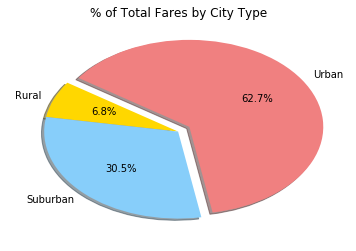

In [5]:
# Calculate Type Percents
total_fares = full_df['fare'].sum()
urban_fares = urban.sum()['fare'].sum()/total_fares
suburb_fares = suburb.sum()['fare'].sum()/total_fares
rural_fares = rural.sum()['fare'].sum()/total_fares

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
plt.pie([urban_fares, rural_fares, suburb_fares], labels=labels, autopct="%1.1f%%", startangle=280, shadow = True, \
        colors = ['lightcoral', 'gold', 'lightskyblue'], explode = [0.1,0,0])
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('% of Total Fares by City Type', dpi = 200)

# Show Figure
plt.show()

## Total Rides by City Type

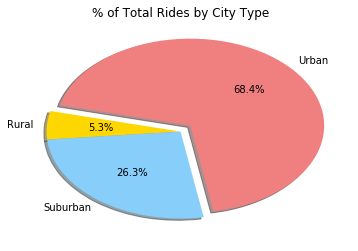

In [6]:
# Calculate Ride Percents
total_rides = full_df['ride_id'].count()
urban_rides = urban['ride_id'].count().sum()/total_rides
suburb_rides = suburb['ride_id'].count().sum()/total_rides
rural_rides = rural['ride_id'].count().sum()/total_rides

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
plt.pie([urban_rides, rural_rides, suburb_rides], labels=labels, autopct="%1.1f%%", startangle=280, shadow = True, \
        colors = ['lightcoral', 'gold', 'lightskyblue'], explode = [0.1,0,0])
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('% of Total Rides by City Type', dpi = 200)

# Show Figure
plt.show()

## Total Drivers by City Type

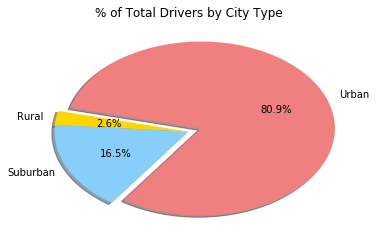

In [7]:
# Calculate Driver Percents
total_drivers = sum(full_df.groupby('city')['driver_count'].sum()/full_df.groupby('city')['driver_count'].count())
urban_drivers = sum(urban['driver_count'].sum()/urban['driver_count'].count())/total_drivers
suburb_drivers = sum(suburb['driver_count'].sum()/suburb['driver_count'].count())/total_drivers
rural_drivers = sum(rural['driver_count'].sum()/rural['driver_count'].count())/total_drivers

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
plt.pie([urban_drivers, rural_drivers, suburb_drivers], labels=labels, autopct="%1.1f%%", startangle=235, shadow = True, \
        colors = ['lightcoral', 'gold', 'lightskyblue'], explode = [0.1,0,0])
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('% of Total Drivers by City Type', dpi = 200)

# Show Figure
plt.show()